<a href="https://colab.research.google.com/github/ameliautami35/Stress/blob/main/Stress_SMOTE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install imbalanced-learn

In [ ]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Load
file_path = '/content/Stress_Fixs - S1.csv'
df = pd.read_csv(file_path)
df_clean = df[1:].copy()

df.head(10)

,ID,Gender,Faculty,Department,Nature Of God,On Human Nature,Unnamed: 6,Unnamed: 7,On Knowledge,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,On Ethic,On Reality,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,Q5,Q8,Q9,Q10,Q13,Q14,Q15,Q16,Q17,Q24,Q26,Q27,Q28,Q29,Q30
1,A1,Perempuan,TARBIYAH,Pendidikan Agama Islam,1,4,5,5,5,4,2,1,1,3,3,4,1,1,1
2,A2,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,3,3,4,5,5,5,3,4,5,5,3,4,4,3
3,A3,Perempuan,TARBIYAH,Pendidikan Agama Islam,1,5,5,1,5,5,5,1,1,5,5,5,5,5,5
4,A4,Perempuan,TARBIYAH,Pendidikan Agama Islam,5,5,5,1,5,5,5,1,5,5,5,5,1,1,1
5,A5,Perempuan,TARBIYAH,Pendidikan Agama Islam,1,3,4,1,3,3,4,1,2,2,3,5,4,2,2
6,A6,Perempuan,TARBIYAH,Tadris Bahasa Inggris,2,4,4,1,4,4,4,2,1,3,3,3,1,1,1
7,A7,Perempuan,TARBIYAH,Tadris Bahasa Inggris,2,3,3,3,4,4,4,2,3,4,4,3,2,2,2
8,A8,Perempuan,TARBIYAH,Tadris Bahasa Inggris,3,4,5,5,5,4,4,5,5,3,4,2,5,4,3
9,A9,Perempuan,TARBIYAH,Tadris Bahasa Inggris,2,5,4,4,4,4,3,3,4,4,3,1,4,5,2


In [ ]:
# Reload the dataset with correct header (row 1 as header)
df = pd.read_csv(file_path, header=1)

# Daftar kolom yang ingin di-reverse scoring
reverse_columns = ['Q8', 'Q9', 'Q13', 'Q14', 'Q15', 'Q24', 'Q26', 'Q27']

# Lakukan reverse scoring: 1 -> 5, 2 -> 4, 3 -> 3, 4 -> 2, 5 -> 1
reverse_map = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}
df[reverse_columns] = df[reverse_columns].replace(reverse_map)

# Tampilkan beberapa baris awal dari kolom yang sudah di-reverse
df[reverse_columns].head(10)

,Q8,Q9,Q13,Q14,Q15,Q24,Q26,Q27
0,2,1,1,2,4,3,3,2
1,3,3,1,1,1,1,1,3
2,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1
4,3,2,3,3,2,4,3,1
5,2,2,2,2,2,3,3,3
6,3,3,2,2,2,2,2,3
7,2,1,1,2,2,3,2,4
8,1,2,2,2,3,2,3,5
9,1,1,1,1,1,3,3,2


In [ ]:
# Menjumlahkan skor berdasarkan aspek
df['Nature_of_God'] = df['Q5']
df['On_Human_Nature'] = df[['Q8', 'Q9', 'Q10']].sum(axis=1)
df['On_Knowledge'] = df[['Q13', 'Q14', 'Q15', 'Q16', 'Q17']].sum(axis=1)
df['On_Ethic'] = df['Q24']
df['On_Reality'] = df[['Q26', 'Q27', 'Q28', 'Q29', 'Q30']].sum(axis=1)
df[['On_Human_Nature','On_Knowledge', 'On_Ethic','On_Reality']].head(10)

,On_Human_Nature,On_Knowledge,On_Ethic,On_Reality
0,8,9,3,8
1,10,10,1,15
2,3,5,1,17
3,3,9,1,5
4,6,11,4,12
5,5,9,3,9
6,9,11,2,11
7,8,15,3,18
8,7,14,2,19
9,7,11,3,17


In [ ]:
# Lalu totalkan seluruh skor sebagai skor anxiety total
df['Total_Stress_Score'] = df[['On_Human_Nature','On_Knowledge', 'On_Ethic','On_Reality']].sum(axis=1)

In [ ]:
def classify_anxiety(score):
    if score <= 32:
        return 'Mild'
    elif score <= 51:
        return 'Moderate'
    else:
        return 'Severe'

df['Stress_Level'] = df['Total_Stress_Score'].apply(classify_anxiety)
df[['Total_Stress_Score', 'Stress_Level']].head(10)


,Total_Stress_Score,Stress_Level
0,28,Mild
1,36,Moderate
2,26,Mild
3,18,Mild
4,33,Moderate
5,26,Mild
6,33,Moderate
7,44,Moderate
8,42,Moderate
9,38,Moderate


In [ ]:
# Ganti nama kolom Unnamed: 0 - Unnamed: 3 menjadi yang sesuai
df.rename(columns={
    'Unnamed: 0': 'ID',
    'Unnamed: 1': 'Gender',
    'Unnamed: 2': 'Faculty',
    'Unnamed: 3': 'Department'
}, inplace=True)

In [ ]:
#Bersihkan dan encode kolom Gender
# Hilangkan spasi dan normalisasi format
df['Gender'] = df['Gender'].str.replace(' - ', '-', regex=False).str.strip()

# Tambahkan Gender_Code (0 = Perempuan, 1 = Laki-laki)
df['Gender_Code'] = df['Gender'].map({'Perempuan': 0, 'Laki-laki': 1})

df[['Gender', 'Gender_Code']].head(70-80)

,Gender,Gender_Code
0,Perempuan,0
1,Perempuan,0
2,Perempuan,0
3,Perempuan,0
4,Perempuan,0
...,...,...
131,Laki-laki,1
132,Laki-laki,1
133,Laki-laki,1
134,Laki-laki,1


In [ ]:
# Encode kolom prodi
le_prodi = LabelEncoder()
df['Department_encoded'] = le_prodi.fit_transform(df['Department'])

# Cek hasil encoding
print(df[['Department', 'Department_encoded']].drop_duplicates().sort_values('Department_encoded'))



                          Department  Department_encoded
72                     Agroteknologi                   0
20             Akidah Filsafat Islam                   1
38                     Ekonomi Islam                   2
55                           Farmasi                   3
50                              Gizi                   4
44            Hubungan International                   5
23             Hukum Ekonomi Syariah                   6
15         Ilmu Al-Qur'an dan Tafsir                   7
123  Keselamatan dan Kesehatan Kerja                   8
33                         Manajemen                   9
0             Pendidikan Agama Islam                  10
10            Pendidikan Bahasa Arab                  11
28              Perbandingan Madzhab                  12
109                Studi Agama-agama                  13
5              Tadris Bahasa Inggris                  14
60                Teknik Informatika                  15
144     Teknologi Industri Pert

In [ ]:
# Cek dulu distribusi kelas
print(y.value_counts())

# Pakai k_neighbors kecil
smote = SMOTE(k_neighbors=1, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

Stress_Level
Mild        75
Moderate    69
Severe       2
Name: count, dtype: int64
Stress_Level
Mild        75
Moderate    75
Severe      75
Name: count, dtype: int64


In [ ]:
X = df[['Nature_of_God', 'On_Human_Nature', 'On_Knowledge', 'On_Ethic', 'On_Reality', 'Gender_Code', 'Department_encoded']]
y = df['Stress_Level']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [ ]:
# Buat model
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
#Prediksi & Evaluasi
y_pred = svm_model.predict(X_test)

In [ ]:
# Tampilkan akurasi
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi SVM: {acc:.2f}")

Akurasi SVM: 0.96


Classification Report:
              precision    recall  f1-score   support

        Mild       1.00      0.92      0.96        13
    Moderate       0.92      0.92      0.92        13
      Severe       0.95      1.00      0.97        19

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



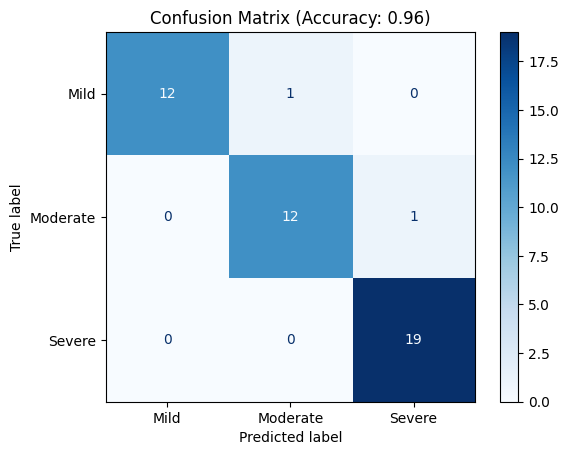

In [ ]:
#Classification Report & Confusion Matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Mild', 'Moderate', 'Severe']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['Mild', 'Moderate', 'Severe'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Mild', 'Moderate', 'Severe'])
disp.plot(cmap=plt.cm.Blues)
plt.title(f'Confusion Matrix (Accuracy: {acc:.2f})')
plt.show()


In [ ]:
# Hitung jumlah per label stres
Anxiety_counts = df['Stress_Level'].value_counts().sort_index()

# Hitung persentase tiap label
Anxiety_percent = (Anxiety_counts / Anxiety_counts.sum()) * 100

# Gabungkan jumlah dan persentase dalam satu dataframe
Anxiety_df = pd.DataFrame({
    'Jumlah': Anxiety_counts,
    'Persentase (%)': Anxiety_percent.round(2)
})

print("Distribusi Tingkat Kecemasan:")
print(Anxiety_df)


Distribusi Tingkat Kecemasan:
              Jumlah  Persentase (%)
Stress_Level                        
Mild              75           51.37
Moderate          69           47.26
Severe             2            1.37


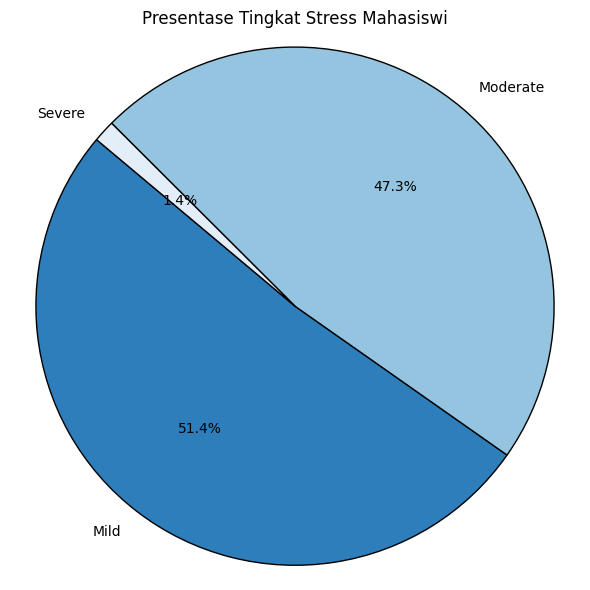

In [ ]:
# Hitung jumlah per label kecemasan (misalnya kolom bernama 'Anxiety')
anxiety_counts = df['Stress_Level'].value_counts()
anxiety_percent = (anxiety_counts / anxiety_counts.sum()) * 100

# Buat pie chart
plt.figure(figsize=(6, 6))
plt.pie(anxiety_counts,
        labels=anxiety_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=plt.cm.Blues_r(np.linspace(0.3, 0.9, len(anxiety_counts))),
        wedgeprops={'edgecolor': 'black'})

plt.title('Presentase Tingkat Stress Mahasiswi')
plt.axis('equal')  # Membuat pie chart jadi lingkaran sempurna
plt.tight_layout()
plt.show()


In [ ]:
# Total seluruh stres (tanpa rinci per label)
total_stress_by_gender = df['Gender'].value_counts()
print("Total Responden per Gender:")
print(total_stress_by_gender)

Total Responden per Gender:
Gender
Perempuan    73
Laki-laki    73
Name: count, dtype: int64


Jumlah Responden per Tingkat Stres dan Gender:
Stress_Level  Mild  Moderate  Severe
Gender                              
Laki-laki     33.0      38.0     2.0
Perempuan     42.0      31.0     0.0


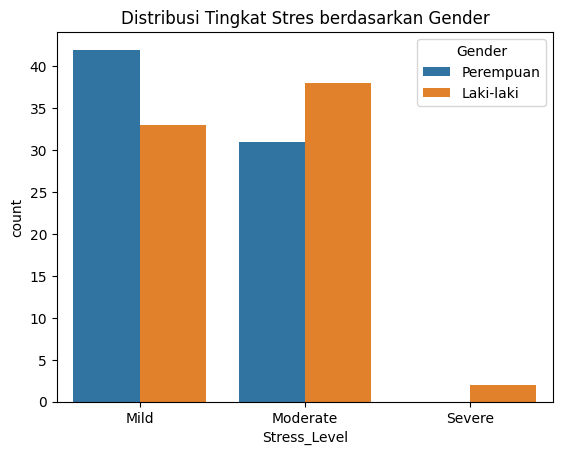

In [ ]:
# Hitung jumlah Mild, Moderate, Severe per gender
stress_counts = df.groupby(['Gender','Stress_Level']).size().unstack().fillna(0)
print("Jumlah Responden per Tingkat Stres dan Gender:")
print(stress_counts)

sns.countplot(x='Stress_Level', hue='Gender', data=df)
plt.title('Distribusi Tingkat Stres berdasarkan Gender')
plt.show()

Rata-rata Skor Stres per Gender:
Gender
Laki-laki    33.561644
Perempuan    30.821918
Name: Total_Stress_Score, dtype: float64


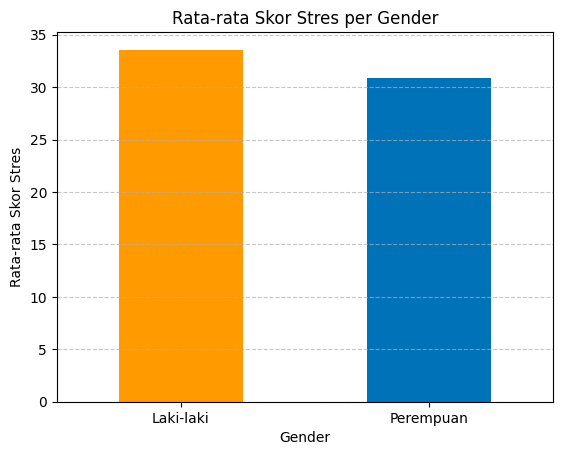

In [ ]:
# Hitung rata-rata total skor EAQ per gender
avg_eaq_by_gender = df.groupby('Gender')['Total_Stress_Score'].mean()
print("Rata-rata Skor Stres per Gender:")
print(avg_eaq_by_gender)

# Visualisasi rata-rata skor kecemasan per gender
avg_eaq_by_gender.plot(kind='bar', color=['#FF9A00', '#0072B8'])
plt.title('Rata-rata Skor Stres per Gender')
plt.xlabel('Gender')
plt.ylabel('Rata-rata Skor Stres')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
if avg_eaq_by_gender['Perempuan'] > avg_eaq_by_gender['Laki-laki']:
    print("🔍 Perempuan cenderung memiliki tingkat Kecemasan lebih tinggi.")
elif avg_eaq_by_gender['Perempuan'] < avg_eaq_by_gender['Laki-laki']:
    print("🔍 Laki-laki cenderung memiliki tingkat Kecemasan lebih tinggi.")
else:
    print("🔍 Rata-rata tingkat Kecemasan antara laki-laki dan perempuan seimbang.")


🔍 Laki-laki cenderung memiliki tingkat Kecemasan lebih tinggi.


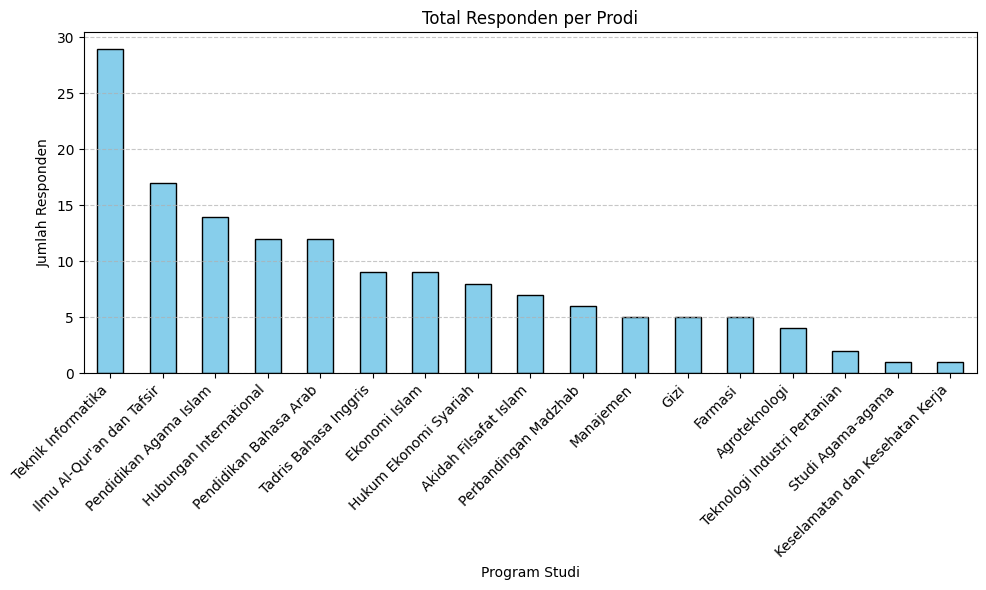

In [ ]:
# Hitung jumlah responden per prodi
responden_per_prodi = df['Department'].value_counts()

# Plot bar chart
plt.figure(figsize=(10, 6))
responden_per_prodi.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Total Responden per Prodi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Responden')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Hitung jumlah Mild, Moderate, Severe per gender
stress_counts = df.groupby(['Department','Stress_Level']).size().unstack().fillna(0)
print("Jumlah Responden per Tingkat Stres dan Prodi:")
print(stress_counts)

Jumlah Responden per Tingkat Stres dan Prodi:
Stress_Level                     Mild  Moderate  Severe
Department                                             
Agroteknologi                     1.0       3.0     0.0
Akidah Filsafat Islam             5.0       2.0     0.0
Ekonomi Islam                     3.0       6.0     0.0
Farmasi                           5.0       0.0     0.0
Gizi                              2.0       3.0     0.0
Hubungan International            7.0       5.0     0.0
Hukum Ekonomi Syariah             6.0       2.0     0.0
Ilmu Al-Qur'an dan Tafsir        10.0       7.0     0.0
Keselamatan dan Kesehatan Kerja   0.0       1.0     0.0
Manajemen                         3.0       2.0     0.0
Pendidikan Agama Islam            7.0       7.0     0.0
Pendidikan Bahasa Arab            5.0       6.0     1.0
Perbandingan Madzhab              4.0       2.0     0.0
Studi Agama-agama                 0.0       1.0     0.0
Tadris Bahasa Inggris             3.0       6.0     0.0
Te

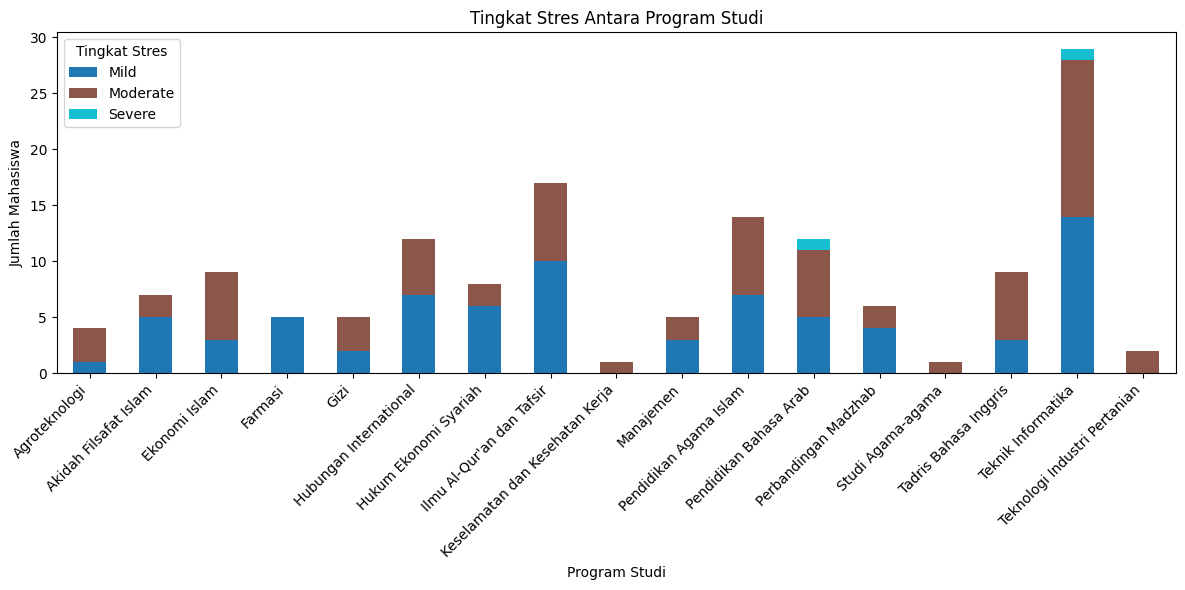

In [ ]:
# Hitung jumlah mahasiswa per tingkat stres dan prodi
prodi_stres_counts = df.groupby(['Department', 'Stress_Level']).size().unstack(fill_value=0)

# Buat stacked bar chart
prodi_stres_counts.plot(kind='bar',
                         stacked=True,
                         colormap='tab10',
                         figsize=(12, 6))

plt.title('Tingkat Stres Antara Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah Mahasiswa')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tingkat Stres')
plt.tight_layout()
plt.show()

In [ ]:
department_stats = df.groupby('Department').agg(
    Rata2_stres=('Total_Stress_Score', 'mean'),
    Jumlah_Responden=('Total_Stress_Score', 'count')
)

# Tampilkan dulu biar yakin
print("Sebelum filter:\n", department_stats)

Sebelum filter:
                                  Rata2_stres  Jumlah_Responden
Department                                                    
Agroteknologi                      37.000000                 4
Akidah Filsafat Islam              30.857143                 7
Ekonomi Islam                      35.222222                 9
Farmasi                            22.400000                 5
Gizi                               31.600000                 5
Hubungan International             32.000000                12
Hukum Ekonomi Syariah              31.250000                 8
Ilmu Al-Qur'an dan Tafsir          31.411765                17
Keselamatan dan Kesehatan Kerja    36.000000                 1
Manajemen                          33.400000                 5
Pendidikan Agama Islam             31.428571                14
Pendidikan Bahasa Arab             33.666667                12
Perbandingan Madzhab               26.166667                 6
Studi Agama-agama                  33.

In [ ]:
# Buat threshold minimal responden (misalnya 5)
min_responden = 5

# Filter
filtered_stats = department_stats[department_stats['Jumlah_Responden'] >= min_responden]

print("Setelah filter:\n", filtered_stats)


Setelah filter:
                            Rata2_stres  Jumlah_Responden
Department                                              
Akidah Filsafat Islam        30.857143                 7
Ekonomi Islam                35.222222                 9
Farmasi                      22.400000                 5
Gizi                         31.600000                 5
Hubungan International       32.000000                12
Hukum Ekonomi Syariah        31.250000                 8
Ilmu Al-Qur'an dan Tafsir    31.411765                17
Manajemen                    33.400000                 5
Pendidikan Agama Islam       31.428571                14
Pendidikan Bahasa Arab       33.666667                12
Perbandingan Madzhab         26.166667                 6
Tadris Bahasa Inggris        35.333333                 9
Teknik Informatika           32.551724                29


In [ ]:
avg_stres_by_department = df.groupby('Department')['Total_Stress_Score'].mean()
avg_stres_by_department = filtered_stats['Rata2_stres']

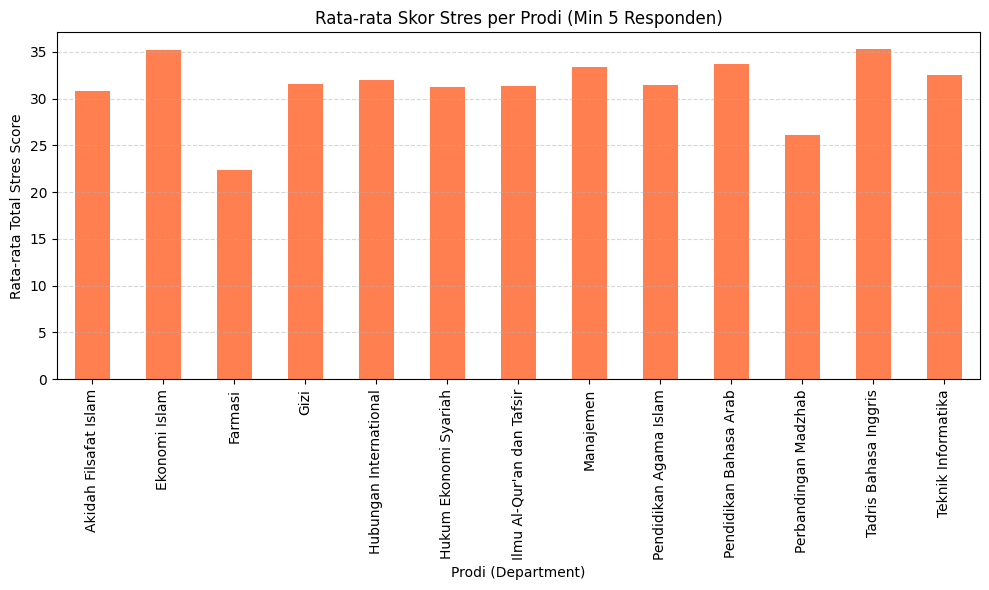

In [ ]:
avg_stres_by_department.plot(kind='bar', figsize=(10,6), color='coral')
plt.title(f'Rata-rata Skor Stres per Prodi (Min {min_responden} Responden)')
plt.xlabel('Prodi (Department)')
plt.ylabel('Rata-rata Total Stres Score')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [ ]:
prodi_tertinggi = avg_stres_by_department.idxmax()
skor_tertinggi = avg_stres_by_department.max()

print(f"🔍 Prodi dengan tingkat Stres rata-rata tertinggi (Min {min_responden} responden) adalah **{prodi_tertinggi}** dengan skor rata-rata {skor_tertinggi:.2f}.")


🔍 Prodi dengan tingkat Stres rata-rata tertinggi (Min 5 responden) adalah **Tadris Bahasa Inggris** dengan skor rata-rata 35.33.


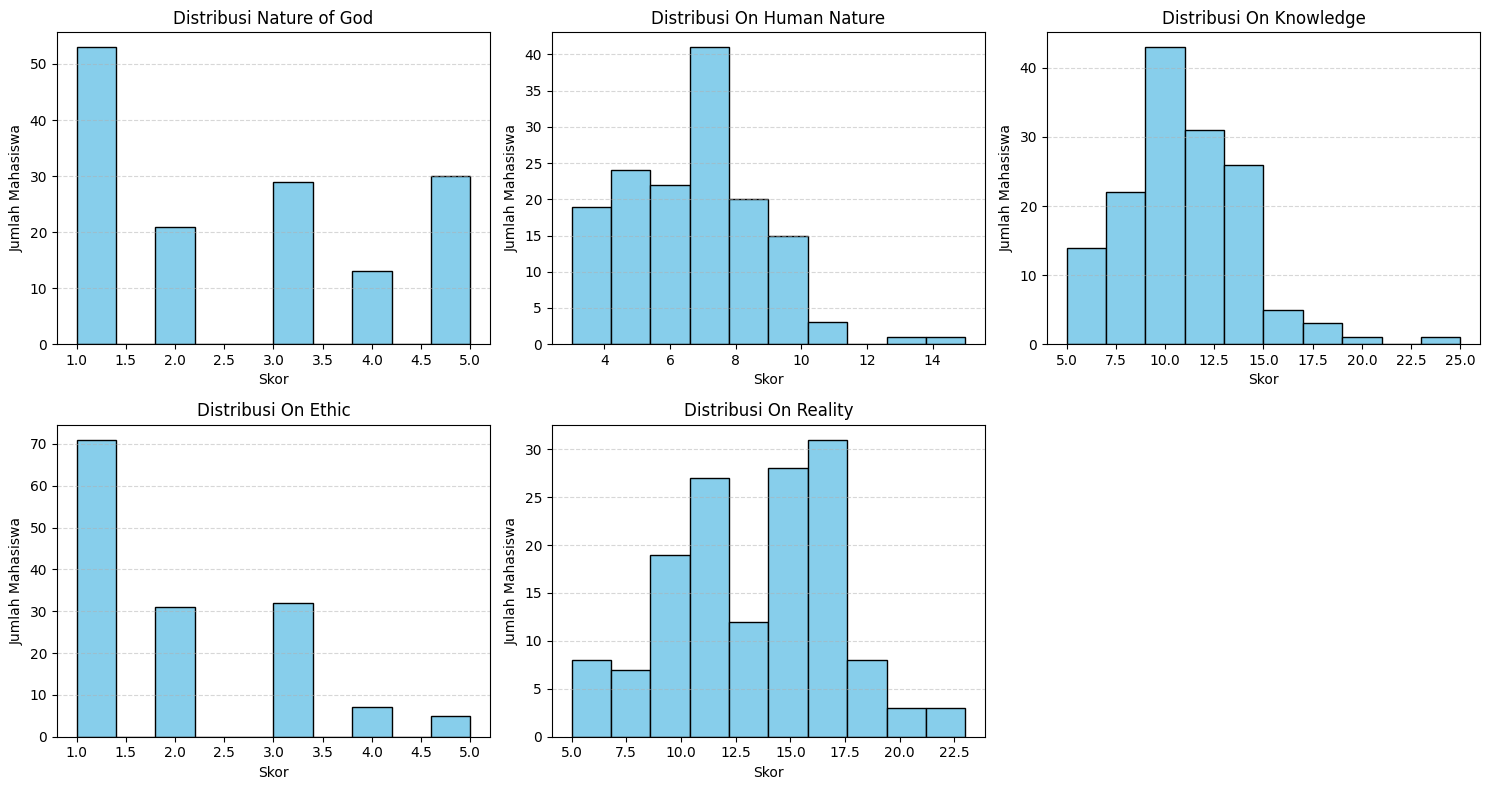

In [ ]:
aspek_cols = [
    'Nature_of_God',
    'On_Human_Nature',
    'On_Knowledge',
    'On_Ethic',
    'On_Reality'
]

titles = [
    'Nature of God',
    'On Human Nature',
    'On Knowledge',
    'On Ethic',
    'On Reality'
]

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(aspek_cols):
    df[col].plot(kind='hist',
                 bins=10,
                 ax=axs[i],
                 color='skyblue',
                 edgecolor='black')
    axs[i].set_title(f'Distribusi {titles[i]}')
    axs[i].set_xlabel('Skor')
    axs[i].set_ylabel('Jumlah Mahasiswa')
    axs[i].grid(axis='y', linestyle='--', alpha=0.5)

# Kosongkan subplot ke-6
fig.delaxes(axs[-1])

plt.tight_layout()
plt.show()


             Aspek    F_Score       P_Value
0    Nature_of_God   7.300428  9.573899e-04
3         On_Ethic  18.491270  7.203688e-08
1  On_Human_Nature  31.707210  4.005108e-12
4       On_Reality  58.220150  3.183098e-19
2     On_Knowledge  72.785988  1.578901e-22


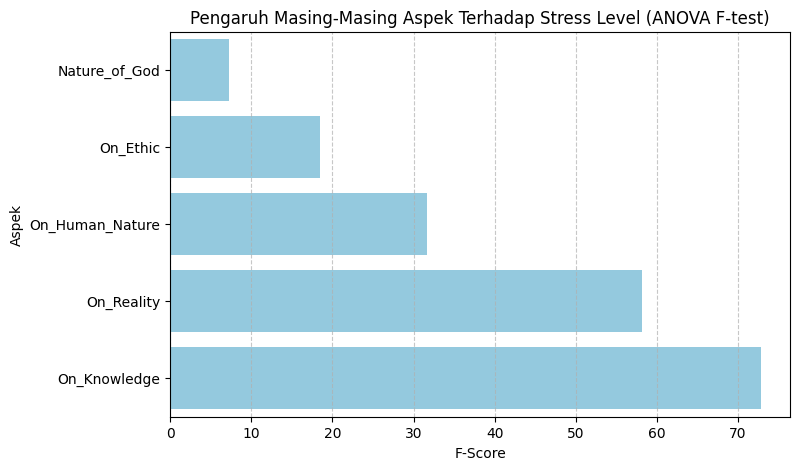

In [ ]:
# Pastikan target numerik
le = LabelEncoder()
df['Stress_Num'] = le.fit_transform(df['Stress_Level'])

X = df[aspek_cols]
y = df['Stress_Num']

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# Buat dataframe skor
feature_scores = pd.DataFrame({
    'Aspek': aspek_cols,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=True)

print(feature_scores)

# Visual barplot
plt.figure(figsize=(8, 5))
sns.barplot(x='F_Score', y='Aspek', data=feature_scores, color='skyblue')
plt.title('Pengaruh Masing-Masing Aspek Terhadap Stress Level (ANOVA F-test)')
plt.xlabel('F-Score')
plt.ylabel('Aspek')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

skf = StratifiedKFold(n_splits=5)
scores = cross_val_score(svm_model, X, y, cv=skf, scoring='f1_weighted')  # atau 'accuracy'

print("Cross-validated F1-scores:", scores)
print("Average F1-score:", scores.mean())


Cross-validated F1-scores: [0.81774691 0.89655172 0.96543485 0.96543485 0.87939655]
Average F1-score: 0.9049129760090086
